This notebook was created by Donna Faith Go.

For this notebook, I learned about CNNs from [this YouTube video](https://www.youtube.com/watch?v=J1jhfAw5Uvo).
Here, they did a binary image classification.

## Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# convolutional neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf

## Load Dataset

In [2]:
# get the train files
input_file = r'dataset/input.csv'
x_train = np.loadtxt(input_file, delimiter = ',')

labels_file = r'dataset/labels.csv'
y_train = np.loadtxt(labels_file, delimiter = ',')

# get the test files
input_test = r'dataset/input_test.csv'
x_test = np.loadtxt(input_test, delimiter = ',')

labels_test = r'dataset/labels_test.csv'
y_test = np.loadtxt(labels_test, delimiter = ',')

In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

## Data Preprocessing

In [4]:
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

Here, all values should be divided by 255 because the scale of the values is from 1 to 255. 
This is the typical numbers for RGB. 

In [5]:
x_train = x_train/255
x_test = x_test/255
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

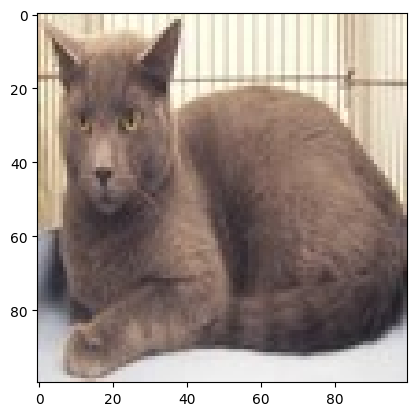

In [6]:
idx = np.random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])

## Model

Sequential model means that the layers are stacked up in a sequence. 
You can have multiple convolutional and fully connected layers. 

Here are the layers and what they mean:
1. Conv2D: convolutional layer that takes in a 2D image. 3D would entail that you are inputting a video.
2. MaxPooling2D:

Here are some things you need to know about hyperparameter tuning:
1. activation: use 'sigmoid' if it is for a binary classification or output.

There are also two ways to make your model class. Below shows both ways.

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)), 
    MaxPooling2D((2, 2)), 
    Conv2D(32, (3, 3), activation = 'relu'), 
    MaxPooling2D((2, 2)), 

    Flatten(), 
    Dense(62, activation = 'relu'), 
    Dense(1, activation = 'sigmoid') # output layer should have the same output layer as the class
])

C:\Users\Donna\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3))
)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(62, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Here, we start adding loss and backpropagation.

In [9]:
def f1_score(y_true, y_pred):
    # Convert probabilities → 0/1
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)

    return 2 * (precision * recall) / (precision + recall + 1e-8)

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy', f1_score]
)

In [10]:
model.fit(
    x_train, y_train, 
    epochs = 5, batch_size = 64
)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.4975 - f1_score: 0.3349 - loss: 0.7458
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5130 - f1_score: 0.0802 - loss: 0.6906
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6005 - f1_score: 0.4748 - loss: 0.6616
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6610 - f1_score: 0.6213 - loss: 0.6219
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7095 - f1_score: 0.7125 - loss: 0.5799


When you select model.fit again, but do not compile it beforehand, then it will add more epochs to the ones that you currently set.
Since we had 5 epochs earlier, then it would now do 10 epochs (but it is shown as 5).

For your reference, you can look at the accuracy and the f1 score every time. 

In [11]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6800 - f1_score: 0.4251 - loss: 0.5981


[0.5981268882751465, 0.6800000071525574, 0.425089031457901]

As seen in the results of `model.evaluate`, we can tell that the model overfits a little bit. 
The final test score of the latest epoch of the train set is 0.75. In the test set, it is 0.65.
This is a big difference.

## Making Predictions

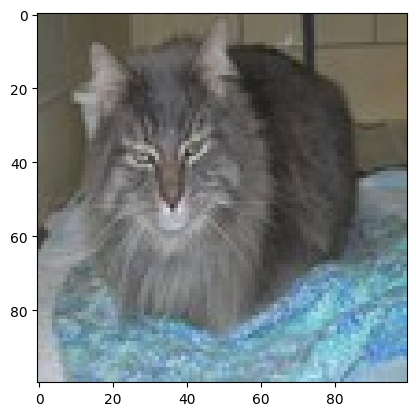

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
This is a dog.


In [64]:
idx2 = np.random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(
    x_test[idx2, :].reshape(1, 100, 100, 3)
)

if y_pred > 0.5:
    print('This is a dog.')
else:
    print('This is a cat.')

In [19]:
!pip install 

'pip' is not recognized as an internal or external command,
operable program or batch file.
